# EMIPredict AI — Financial Risk EDA

# This notebook analyzes financial patterns influencing EMI approval decisions.

Shape: (404800, 27)
<class 'pandas.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  int64  
 1   gender                  404800 non-null  str    
 2   marital_status          404800 non-null  str    
 3   education               402396 non-null  str    
 4   monthly_salary          404800 non-null  int64  
 5   employment_type         404800 non-null  str    
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  str    
 8   house_type              404800 non-null  str    
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expe

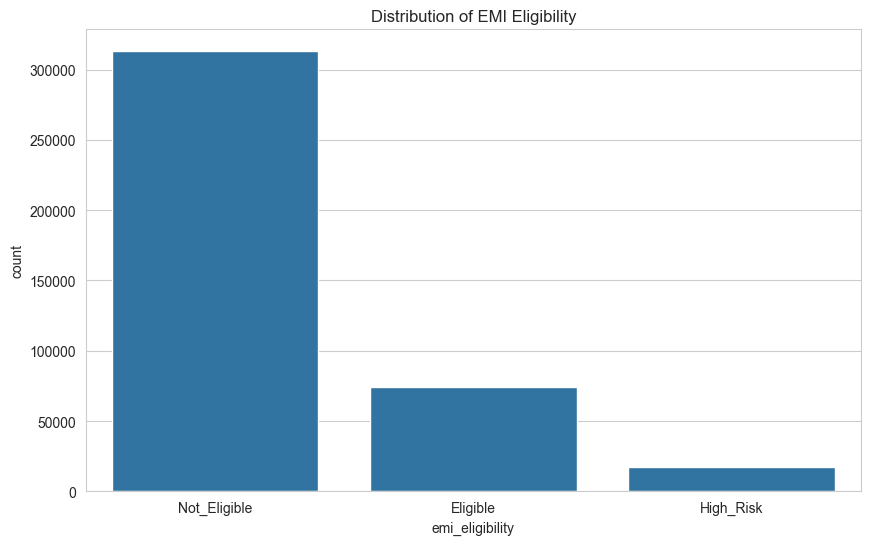

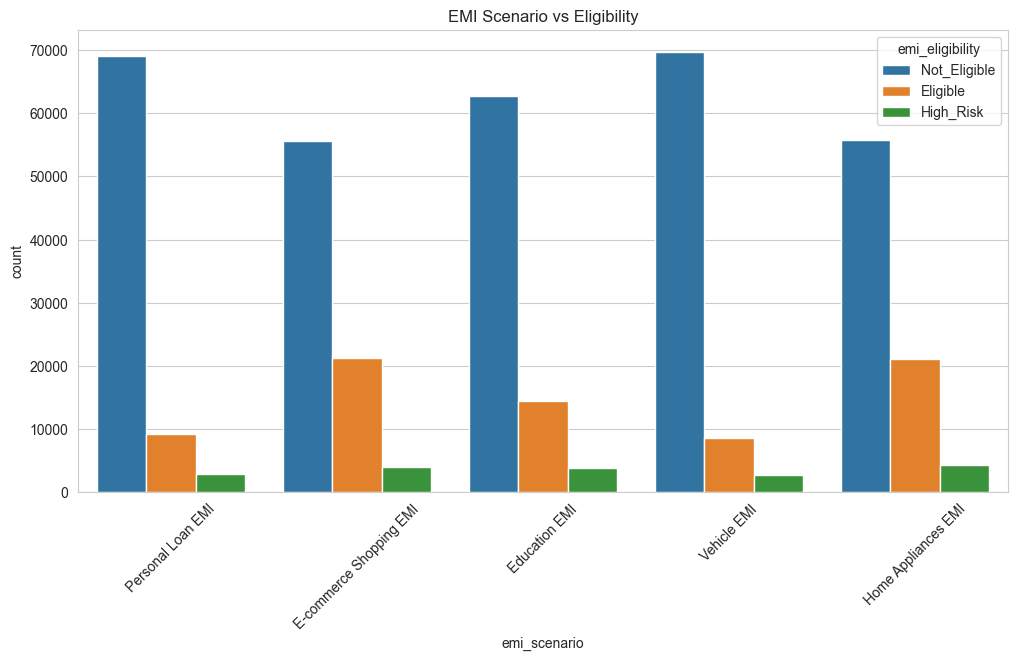

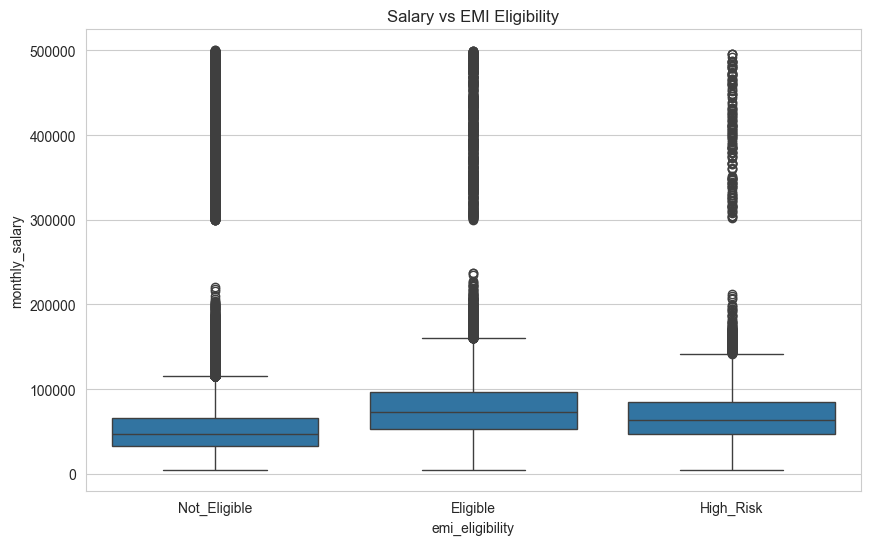

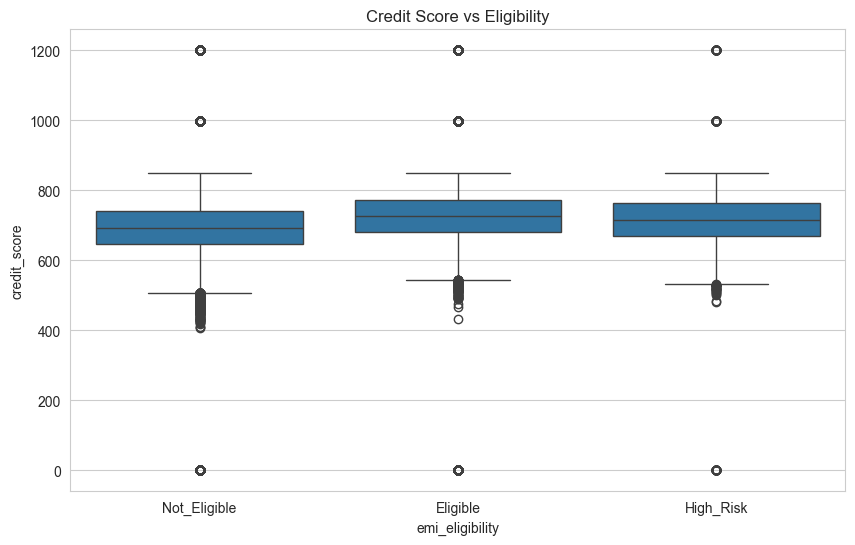

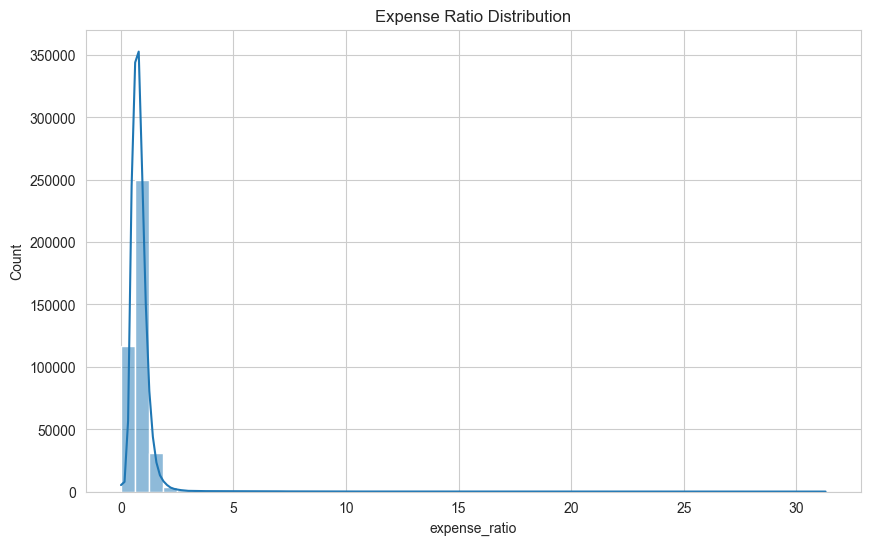

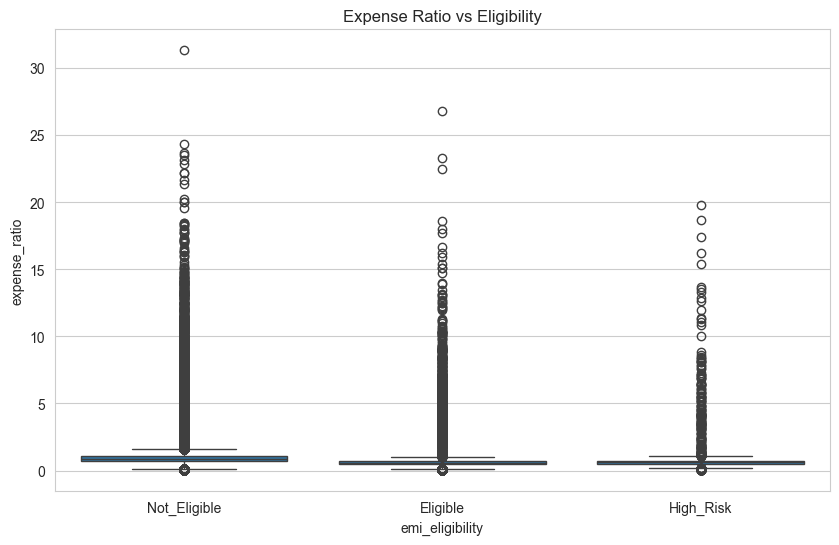

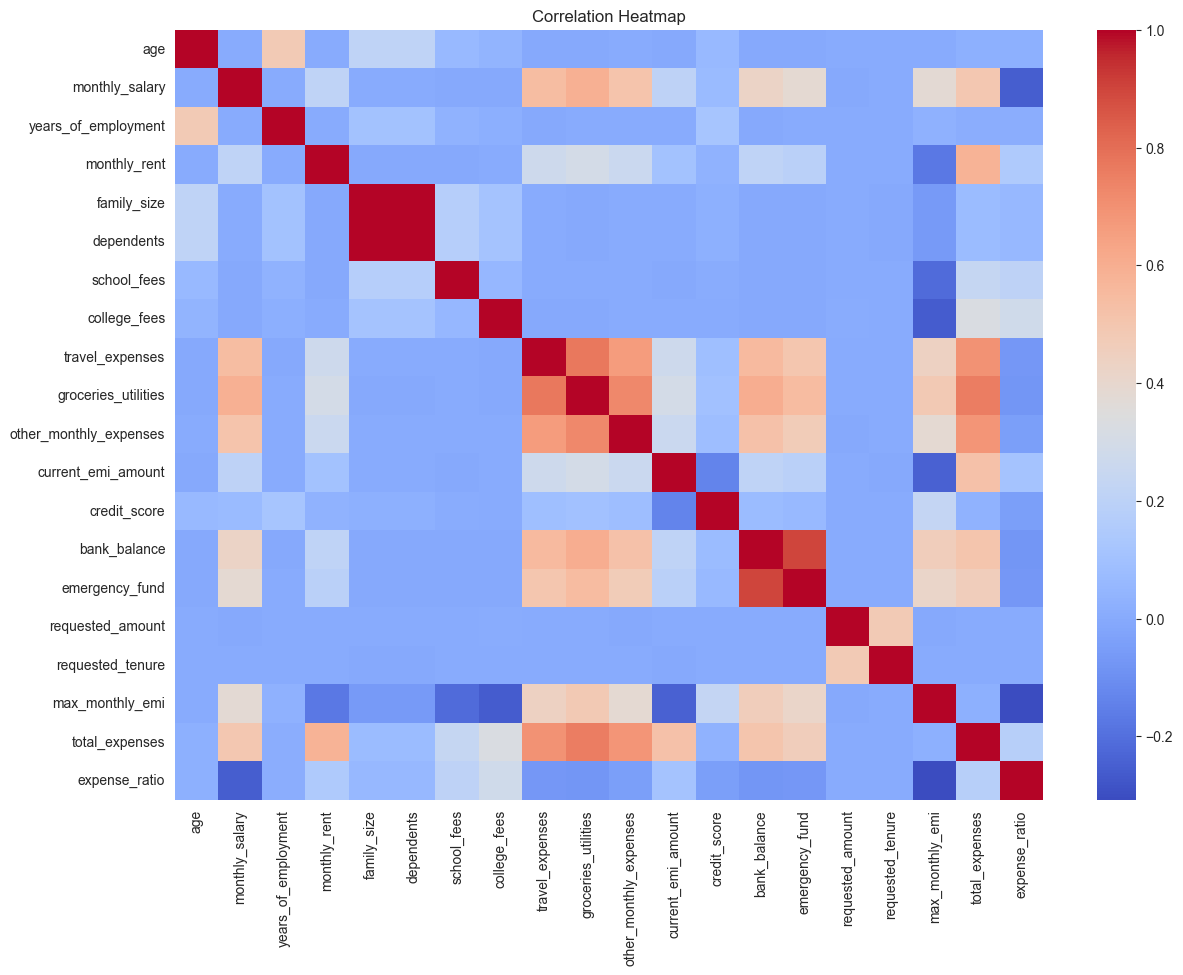

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
df = pd.read_csv("../Data/cleaned_emi_dataset.csv")

print("Shape:", df.shape)
df.head()
df.info()
df.describe()
sns.countplot(data=df, x="emi_eligibility")
plt.title("Distribution of EMI Eligibility")
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="emi_scenario", hue="emi_eligibility")
plt.xticks(rotation=45)
plt.title("EMI Scenario vs Eligibility")
plt.show()
sns.boxplot(data=df, x="emi_eligibility", y="monthly_salary")
plt.title("Salary vs EMI Eligibility")
plt.show()
sns.boxplot(data=df, x="emi_eligibility", y="credit_score")
plt.title("Credit Score vs Eligibility")
plt.show()
expense_cols = [
    "monthly_rent","school_fees","college_fees",
    "travel_expenses","groceries_utilities",
    "other_monthly_expenses","current_emi_amount"
]

df["total_expenses"] = df[expense_cols].sum(axis=1)
df["expense_ratio"] = df["total_expenses"] / df["monthly_salary"]
sns.histplot(df["expense_ratio"], bins=50, kde=True)
plt.title("Expense Ratio Distribution")
plt.show()
sns.boxplot(data=df, x="emi_eligibility", y="expense_ratio")
plt.title("Expense Ratio vs Eligibility")
plt.show()
numeric_df = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()



# Key Financial Risk Insights

• Dataset is imbalanced with majority rejected applicants, reflecting real banking risk behavior.

• Salary strongly influences approval decisions. Customers with higher income show higher eligibility rates.

• Certain loan scenarios such as vehicle and personal loans exhibit higher rejection patterns.

• Credit score contributes to eligibility but is not the sole determinant.

• Expense ratio appears to influence approval decisions, with higher ratios associated with rejection.

• Correlation analysis shows meaningful relationships among financial variables, indicating a strong foundation for predictive modeling.

These findings confirm that financial strength, credit reliability, and disposable income drive EMI approval decisions.
